In [97]:
import numpy as np
import pandas as pd

In [98]:
# Training data (Houses 2, 3 and 5) -> Houses 4 and 6 do not have microwave data
house2 = []
microwaveHouse2 = []
mainHouse2 = []

house3 = []
microwaveHouse3 = []
mainHouse3 = []

house5 = []
microwaveHouse5 = []
mainHouse5 = []

for i in range(2,7):
    house = "../redd-preprocessed/redd_house{}_".format(i)
    if i == 2:
        for ii in range(0,7):
            house2.append(np.array(pd.read_csv(house + "{}.csv".format(ii))).tolist())
        for file in house2:
            for timestep in file:
                microwaveHouse2.append(float(timestep[4]))
                mainHouse2.append(float(timestep[7]))
    elif i == 3:
        for ii in range(0,6):
            house3.append(np.array(pd.read_csv(house + "{}.csv".format(ii))).tolist())
        for file in house3:
            for timestep in file:
                microwaveHouse3.append(float(timestep[5]))
                mainHouse3.append(float(timestep[8]))
    elif i == 5:
        for timestep in np.array(pd.read_csv(house + "0.csv")).tolist():
            microwaveHouse5.append(float(timestep[6]))
            mainHouse5.append(float(timestep[9]))

In [99]:
print("House 2 first Microwave datapoint: " + str(np.array(microwaveHouse2)[0]))
print("House 2 first Main datapoint: " + str(np.array(mainHouse2)[0]))
print("House 2 last Microwave datapoint: " + str(np.array(microwaveHouse2)[len(microwaveHouse2)-1]))
print("House 2 last Main datapoint: " + str(np.array(mainHouse2)[len(mainHouse2)-1]))

print("House 3 first Microwave datapoint: " + str(np.array(microwaveHouse3)[0]))
print("House 3 first Main datapoint: " + str(np.array(mainHouse3)[0]))
print("House 3 last Microwave datapoint: " + str(np.array(microwaveHouse3)[len(microwaveHouse3)-1]))
print("House 3 last Main datapoint: " + str(np.array(mainHouse3)[len(mainHouse3)-1]))

print("House 5 first Microwave datapoint: " + str(np.array(microwaveHouse5)[0]))
print("House 5 first Main datapoint: " + str(np.array(mainHouse5)[0]))
print("House 5 last Microwave datapoint: " + str(np.array(microwaveHouse5)[len(microwaveHouse5)-1]))
print("House 5 last Main datapoint: " + str(np.array(mainHouse5)[len(mainHouse5)-1]))

House 2 first Microwave datapoint: 5.0
House 2 first Main datapoint: 272.27999877900004
House 2 last Microwave datapoint: 5.0
House 2 last Main datapoint: 291.76998901400003
House 3 first Microwave datapoint: 2.0
House 3 first Main datapoint: 258.070007324
House 3 last Microwave datapoint: 2.0
House 3 last Main datapoint: 114.580001831
House 5 first Microwave datapoint: 4.0
House 5 first Main datapoint: 6077.21972656
House 5 last Microwave datapoint: 3.0
House 5 last Main datapoint: 184.92999267599998


In [100]:
# Testing data (House 1)
house1 = []
microwaveHouse1 = []
mainHouse1 = []

for ii in range(0,11):
    house1.append(np.array(pd.read_csv("../redd-preprocessed/redd_house1_" + "{}.csv".format(ii))).tolist())

for file in house1:
    for timestep in file:
        try:
            int(timestep[5])
            int(timestep[7])
        except:
            # Removes a single nan value in the Main channel
            continue
        microwaveHouse1.append(float(timestep[5]))
        mainHouse1.append(float(timestep[7]))

In [101]:
print("House 1 first Microwave datapoint: " + str(np.array(microwaveHouse1)[0]))
print("House 1 first Main datapoint: " + str(np.array(mainHouse1)[0]))
print("House 1 last Microwave datapoint: " + str(np.array(microwaveHouse1)[len(microwaveHouse1)-1]))
print("House 1 last Main datapoint: " + str(np.array(mainHouse1)[len(mainHouse1)-1]))

House 1 first Microwave datapoint: 4.0
House 1 first Main datapoint: 103.790000916
House 1 last Microwave datapoint: 4.0
House 1 last Main datapoint: 278.160003662


In [102]:
from sklearn.model_selection import train_test_split

applianceTrainingData = microwaveHouse2
mainTrainingData = mainHouse2

applianceTrainingData.extend(microwaveHouse3)
mainTrainingData.extend(mainHouse3)

applianceTrainingData.extend(microwaveHouse5)
mainTrainingData.extend(mainHouse5)

X_train, X_val, y_train, y_val  = train_test_split(mainTrainingData, applianceTrainingData, test_size=0.2, random_state=0)

# Helper methods

data_generator.py

In [103]:
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, mains, appliances_regression, appliances_classification, window_size, batch_size, shuffle=False):
        self.mains = mains
        self.appliances_regression = appliances_regression
        self.appliances_classification = appliances_classification
        self.window_size = window_size
        self.batch_size = batch_size
        self.indices = np.arange(len(self.mains) - self.window_size + 1)
        self.shuffle = shuffle

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        mains_batch = []
        appliances_regression_batch = []
        appliances_classification_batch = []
        appliance_regression_sample = []
        appliance_classification_sample = []

        if idx == self.__len__() - 1:
            inds = self.indices[idx * self.batch_size:]
        else:
            inds = self.indices[idx * self.batch_size: (idx + 1) * self.batch_size]

        for i in inds:
            main_sample = self.mains[i:i + self.window_size]
            appliance_regression_sample = self.appliances_regression[i:i + self.window_size]
            appliance_classification_sample = self.appliances_classification[i:i + self.window_size]

            mains_batch.append(main_sample)
            appliances_regression_batch.append(appliance_regression_sample)
            appliances_classification_batch.append(appliance_classification_sample)

        mains_batch_np = np.array(mains_batch)
        mains_batch_np = np.reshape(mains_batch_np, (mains_batch_np.shape[0], mains_batch_np.shape[1], 1))
        appliances_regression_batch_np = np.array(appliances_regression_batch)
        appliances_regression_batch_np = np.reshape(appliances_regression_batch_np,
                                                    (appliances_regression_batch_np.shape[0],
                                                     appliances_regression_batch_np.shape[1]))
        appliances_classification_batch_np = np.array(appliances_classification_batch)
        appliances_classification_batch_np = np.reshape(appliances_classification_batch_np,
                                                        (appliances_classification_batch_np.shape[0],
                                                         appliances_classification_batch_np.shape[1]))
        return mains_batch_np, [appliances_regression_batch_np, appliances_classification_batch_np]

    def on_epoch_end(self):

        if self.shuffle:
            np.random.shuffle(self.indices)

attention_layer.py

In [104]:
class AttentionLayer(tf.keras.Model):

    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        weight_initializer = 'he_normal'
        self.W = tf.keras.layers.Dense(units, kernel_initializer=weight_initializer)
        self.V = tf.keras.layers.Dense(1, kernel_initializer=weight_initializer)

    def call(self, encoder_output, **kwargs):
        # encoder_output shape == (batch_size, seq_length, latent_dim)
        # score shape == (batch_size, seq_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, seq_length, units)
        score = self.V(tf.nn.tanh(self.W(encoder_output)))

        # attention_weights shape == (batch_size, seq_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

model.py

In [105]:
def build_model(window_size, filters, kernel_size, units):
    input_data = tf.keras.Input(shape=(window_size, 1))

    # CLASSIFICATION SUBNETWORK
    x = tf.keras.layers.Conv1D(filters=30, kernel_size=10, activation='relu')(input_data)
    x = tf.keras.layers.Conv1D(filters=30, kernel_size=8, activation='relu')(x)
    x = tf.keras.layers.Conv1D(filters=40, kernel_size=6, activation='relu')(x)
    x = tf.keras.layers.Conv1D(filters=50, kernel_size=5, activation='relu')(x)
    x = tf.keras.layers.Conv1D(filters=50, kernel_size=5, activation='relu')(x)
    x = tf.keras.layers.Conv1D(filters=50, kernel_size=5, activation='relu')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_normal')(x)
    classification_output = tf.keras.layers.Dense(units=window_size, activation='sigmoid', name="classification_output")(x)

    #REGRESSION SUBNETWORK
    y = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(input_data)
    y = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
    y = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
    y = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
    y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, activation="tanh", return_sequences=True), merge_mode="concat")(y)
    y, weights = AttentionLayer(units=units)(y)
    y = tf.keras.layers.Dense(units, activation='relu')(y)
    regression_output = tf.keras.layers.Dense(window_size, activation='relu', name="regression_output")(y)

    output = tf.keras.layers.Multiply(name="output")([regression_output, classification_output])

    full_model = tf.keras.Model(inputs=input_data, outputs=[output, classification_output], name="LDwA")
    attention_model = tf.keras.Model(inputs=input_data, outputs=weights)

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    full_model.compile(optimizer=optimizer, loss={
        "output": tf.keras.losses.MeanSquaredError(),
        "classification_output": tf.keras.losses.BinaryCrossentropy()})

    return full_model, attention_model

utils.py

In [106]:
def mae(prediction, true):
    MAE = abs(true - prediction)
    MAE = np.sum(MAE)
    MAE = MAE / len(prediction)
    return MAE


def sae(prediction, true, N):
    T = len(prediction)
    K = int(T / N)
    SAE = 0
    for k in range(1, N):
        pred_r = np.sum(prediction[k * N: (k + 1) * N])
        true_r = np.sum(true[k * N: (k + 1) * N])
        SAE += abs(true_r - pred_r)
    SAE = SAE / (K * N)
    return SAE


def f1(prediction, true):
    epsilon = 1e-8
    TP = epsilon
    FN = epsilon
    FP = epsilon
    TN = epsilon
    for i in range(len(prediction)):
        if prediction[i] >= 0.5:
            prediction_binary = 1
        else:
            prediction_binary = 0
        if prediction_binary == 1 and true[i] == 1:
            TP += 1
        elif prediction_binary == 0 and true[i] == 1:
            FN += 1
        elif prediction_binary == 1 and true[i] == 0:
            FP += 1
        elif prediction_binary == 0 and true[i] == 0:
            TN += 1
    R = TP / (TP + FN)
    P = TP / (TP + FP)
    f1 = (2 * P * R) / (P + R)
    return f1


def standardize_data(data, mu=0.0, sigma=1.0):
    #changed from (data -= mu) & (data /= sigma) due to errors in the cell below
    data = data - mu
    data = data / sigma
    return data


def normalize_data(data, min_value=0.0, max_value=1.0):
    #changed from (data -= min_value) & (data /= max_value - min_value) due to errors in the cell below
    data = data - min_value
    data = data / (max_value - min_value)
    return data


def build_overall_sequence(sequences):
    unique_sequence = []
    matrix = [sequences[::-1, :].diagonal(i) for i in range(-sequences.shape[0] + 1, sequences.shape[1])]
    for i in range(len(matrix)):
        unique_sequence.append(np.median(matrix[i]))
    unique_sequence = np.array(unique_sequence)
    return unique_sequence


# Model and Training

In [107]:
from matplotlib import pyplot as plt

# Training only with House 5 data
X_train, X_val, y_train, y_val  = train_test_split(mainHouse5, microwaveHouse5, test_size=0.2, random_state=0)

# Read the NILM dataset
main_train, appliance_train = np.array(X_train), np.array(y_train)
main_val, appliance_val = np.array(X_val), np.array(y_val)
main_test, appliance_test = np.array(mainHouse1), np.array(microwaveHouse1)

# Choose the appliance-specific window size
window_size = 128

# Threshold of 15 Watt for detecting the ON/OFF states
THRESHOLD = 15

# Build ON/OFF appliance vector for the classification subtask
appliance_train_classification = np.copy(appliance_train)
appliance_train_classification[appliance_train_classification <= THRESHOLD] = 0
appliance_train_classification[appliance_train_classification > THRESHOLD] = 1

appliance_val_classification = np.copy(appliance_val)
appliance_val_classification[appliance_val_classification <= THRESHOLD] = 0
appliance_val_classification[appliance_val_classification > THRESHOLD] = 1

# Standardization of the main power and normalization of appliance power
appliance_min_power = np.min(appliance_train)
appliance_max_power = np.max(appliance_train)
main_std = np.std(main_train)
main_mean = np.mean(main_train)

main_train = standardize_data(main_train, np.mean(main_train), np.std(main_train))
main_val = standardize_data(main_val, np.mean(main_val), np.std(main_val))

appliance_train_regression = np.copy(appliance_train)
appliance_train_regression = normalize_data(appliance_train_regression, appliance_min_power, appliance_max_power)

appliance_val_regression = np.copy(appliance_val)
appliance_val_regression = normalize_data(appliance_val_regression, appliance_min_power, appliance_max_power)

# DataGenerator -> def __init__(self, mains, appliances_regression, appliances_classification, window_size, batch_size, shuffle=False):

# Dataset generator
batch_size = 32
train_generator = DataGenerator(main_train, appliance_train_regression,
                                appliance_train_classification, window_size, batch_size)
val_generator = DataGenerator(main_val, appliance_val_regression,
                                appliance_val_classification, window_size, batch_size)

train_steps = train_generator.__len__()
validation_steps = val_generator.__len__()

In [119]:
print(len(train_generator))
x, y = train_generator[0]
print(y[0].shape)

601
(32, 128)


In [108]:
# Tune the appliance-dependent parameters
filters = 32
kernel_size = 4
units = 128

model, att_model = build_model(window_size, filters, kernel_size, units)
model.summary()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "LDwA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 1)]     0           []                               
                                                                                                  
 conv1d_30 (Conv1D)             (None, 119, 30)      330         ['input_4[0][0]']                
                                                                                                  
 conv1d_36 (Conv1D)             (None, 125, 32)      160         ['input_4[0][0]']                
                                                                                                  
 conv1d_31 (Conv1D)             (None, 112, 30)      7230        ['conv1d_30[0][0]']              
                                                                                               

In [109]:
# Original training method
history = model.fit(x=train_generator, epochs=100, steps_per_epoch=train_steps,
                        validation_data=val_generator, validation_steps=validation_steps,
                        callbacks=[early_stop], verbose=1)

Epoch 1/100
601/601 [==============================] - 148s 241ms/step - loss: 0.3029 - output_loss: 0.0098 - classification_output_loss: 0.2931 - val_loss: 0.2595 - val_output_loss: 0.0095 - val_classification_output_loss: 0.2500
Epoch 2/100
601/601 [==============================] - 146s 243ms/step - loss: 0.2741 - output_loss: 0.0098 - classification_output_loss: 0.2643 - val_loss: 0.2590 - val_output_loss: 0.0095 - val_classification_output_loss: 0.2495
Epoch 3/100
601/601 [==============================] - 155s 258ms/step - loss: 0.2741 - output_loss: 0.0098 - classification_output_loss: 0.2643 - val_loss: 0.2584 - val_output_loss: 0.0095 - val_classification_output_loss: 0.2490
Epoch 4/100
601/601 [==============================] - 151s 251ms/step - loss: 0.2733 - output_loss: 0.0098 - classification_output_loss: 0.2636 - val_loss: 0.2585 - val_output_loss: 0.0094 - val_classification_output_loss: 0.2491
Epoch 5/100
601/601 [==============================] - 147s 244ms/step - los

In [476]:
def shift_segment(X,y,seg_length,stride,print_info=True):
    
    X_o_seg = []
    y_o_seg = []
      
    for i in range(len(X)-seg_length+1):
        if i%stride==0:
            assert len(X[i:i+seg_length]) == seg_length
            X_o_seg.append(  X[i:i+seg_length].reshape(-1) ) 

            #y_o_seg.append(  y[i+seg_length//2-1, 0] )
            y_o_seg.append(  y[i:i+seg_length, 0] )
    if print_info==True:           
        print(' '*7,'sequence length = {}'.format(len(X)))
        print(' '*7,'windows length = {}'.format(seg_length))
        print(' '*7,'stride = {}'.format(stride))
        print(' '*7,'segments =',len(y_o_seg))
    
    return np.array(X_o_seg), np.array(y_o_seg)

        sequence length = 558288
        windows length = 128
        stride = 1
        segments = 558161
(558161, 128) (558161, 128)
        sequence length = 242044
        windows length = 128
        stride = 1
        segments = 241917
(241917, 128) (241917, 128)
        sequence length = 24181
        windows length = 128
        stride = 1
        segments = 24054
(24054, 128) (24054, 128)


In [474]:
# the amount of shifting from one window training example to the next
stride = 1

first = True

for main,appliance in [(mainHouse2, microwaveHouse2),(mainHouse3, microwaveHouse3),(mainHouse5, microwaveHouse5)]:

    # Standardization of the main power and normalization of appliance power
    main = standardize_data(main, np.mean(main), np.std(main))

    appliance_min_power = np.min(appliance)
    appliance_max_power = np.max(appliance)
    appliance_regression = np.copy(appliance)
    appliance_regression = normalize_data(appliance_regression, appliance_min_power, appliance_max_power)
    
    #X_i,y_i = expand_dim_data(X, y, MAX_X, MAX_y)
    X = np.expand_dims(main, 1) 
    y = np.expand_dims(appliance_regression, 1) 
    X_seg_i, y_seg_i = shift_segment(X,y,window_size,stride)
    
    print(X_seg_i.shape, y_seg_i.shape)
    # Combine data from all houses
    if first == True:

        X_train = main.tolist()
        y_train = appliance_regression.tolist()
        
        X_o_train_seg = X_seg_i.tolist()
        y_o_train_seg = y_seg_i.tolist()

        first = False
    else:
        
        """X_train = np.vstack((X_train,main))
        y_train = np.vstack((y_train,appliance_regression))

        X_o_train_seg = np.vstack((X_o_train_seg,X_seg_i))
        y_o_train_seg = np.hstack((y_o_train_seg,y_seg_i))"""

        X_train.extend(main)
        y_train.extend(appliance_regression)

        X_o_train_seg.extend(X_seg_i)
        y_o_train_seg.extend(y_seg_i)

#X_train, X_val, y_train, y_val  = train_test_split(X_o_train_seg, y_o_train_seg, test_size=0.2, random_state=0)

train_steps = X_train.__len__()
validation_steps = X_val.__len__()

Model: "LDwA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 128, 1)]     0           []                               
                                                                                                  
 conv1d_350 (Conv1D)            (None, 119, 30)      330         ['input_36[0][0]']               
                                                                                                  
 conv1d_356 (Conv1D)            (None, 125, 32)      160         ['input_36[0][0]']               
                                                                                                  
 conv1d_351 (Conv1D)            (None, 112, 30)      7230        ['conv1d_350[0][0]']             
                                                                                               

AttributeError: 'list' object has no attribute 'isidentifier'

In [ ]:
# Alternative 1 training method
history = model.fit(x=X_o_train_seg, y=y_o_train_seg, epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stop], verbose=1)

In [ ]:
# Alternative 2 training method
dataSetTraining = tf.data.Dataset.from_tensors(X_train, y_train)
dataSetValidation = tf.data.Dataset.from_tensors(X_val, y_val)

history = model.fit(x=dataSetTraining, epochs=100, steps_per_epoch=train_steps,
                    validation_data=dataSetValidation, validation_steps=validation_steps,
                    callbacks=[early_stop], verbose=1)

In [ ]:
# Alternative 3 training method
history = model.fit(x=X_train, y=y_train, epochs=100, steps_per_epoch=train_steps,
                    validation_data=(X_val, y_val), validation_steps=validation_steps,
                    callbacks=[early_stop], verbose=1)

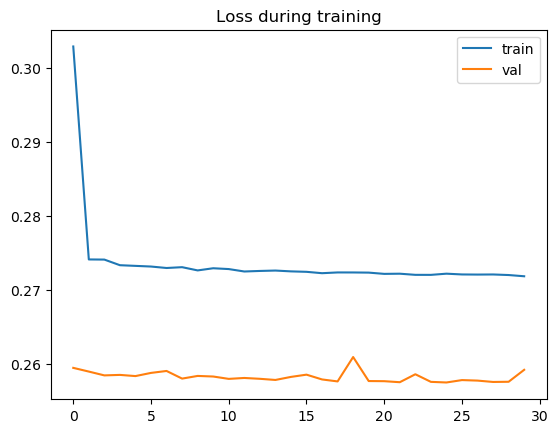

In [110]:
# Plotting the results of training
history_dict = history.history
plt.title('Loss during training')
plt.plot(np.arange(len(history.epoch)), history_dict['loss'])
plt.plot(np.arange(len(history.epoch)), history_dict['val_loss'])
plt.legend(['train', 'val'])
plt.show()

In [111]:
# Test
appliance_test_classification = np.copy(appliance_test)
appliance_test_classification[appliance_test_classification <= THRESHOLD] = 0
appliance_test_classification[appliance_test_classification > THRESHOLD] = 1

appliance_min_power = np.min(appliance_train)
appliance_max_power = np.max(appliance_train)

main_test = standardize_data(main_test, np.mean(main_test), np.std(main_test))

appliance_test_regression = np.copy(appliance_test)
appliance_test_regression = normalize_data(appliance_test_regression, appliance_min_power, appliance_max_power)

batch_size = 32

test_generator = DataGenerator(main_test, appliance_test_regression,
                        appliance_test_classification, window_size, batch_size)

test_steps = test_generator.__len__()

results = model.evaluate(x=test_generator, steps=test_steps)
predicted_output, predicted_on_off = model.predict(x=test_generator, steps=test_steps)

predicted_output *= (appliance_max_power - appliance_min_power)
predicted_output += appliance_min_power
# Clip negative values to zero
predicted_output[predicted_output < 0] = 0.0

prediction = build_overall_sequence(predicted_output)
prediction_on_off = build_overall_sequence(predicted_on_off)

10894/10894 [==============================] - 721s 66ms/step - loss: 0.2354 - output_loss: 0.1112 - classification_output_loss: 0.1241


In [112]:
# Compute metrics
N = 1200
MAE = mae(prediction, appliance_test)
SAE = sae(prediction, appliance_test, N=N)
F1 = f1(prediction_on_off, appliance_test_classification)

print("MAE = {}".format(MAE))
print("SAE = {}".format(SAE))
print("F1 = {}".format(F1))

MAE = 17.404446158908065
SAE = 15.666097448590158
F1 = 5.050505050454036e-12


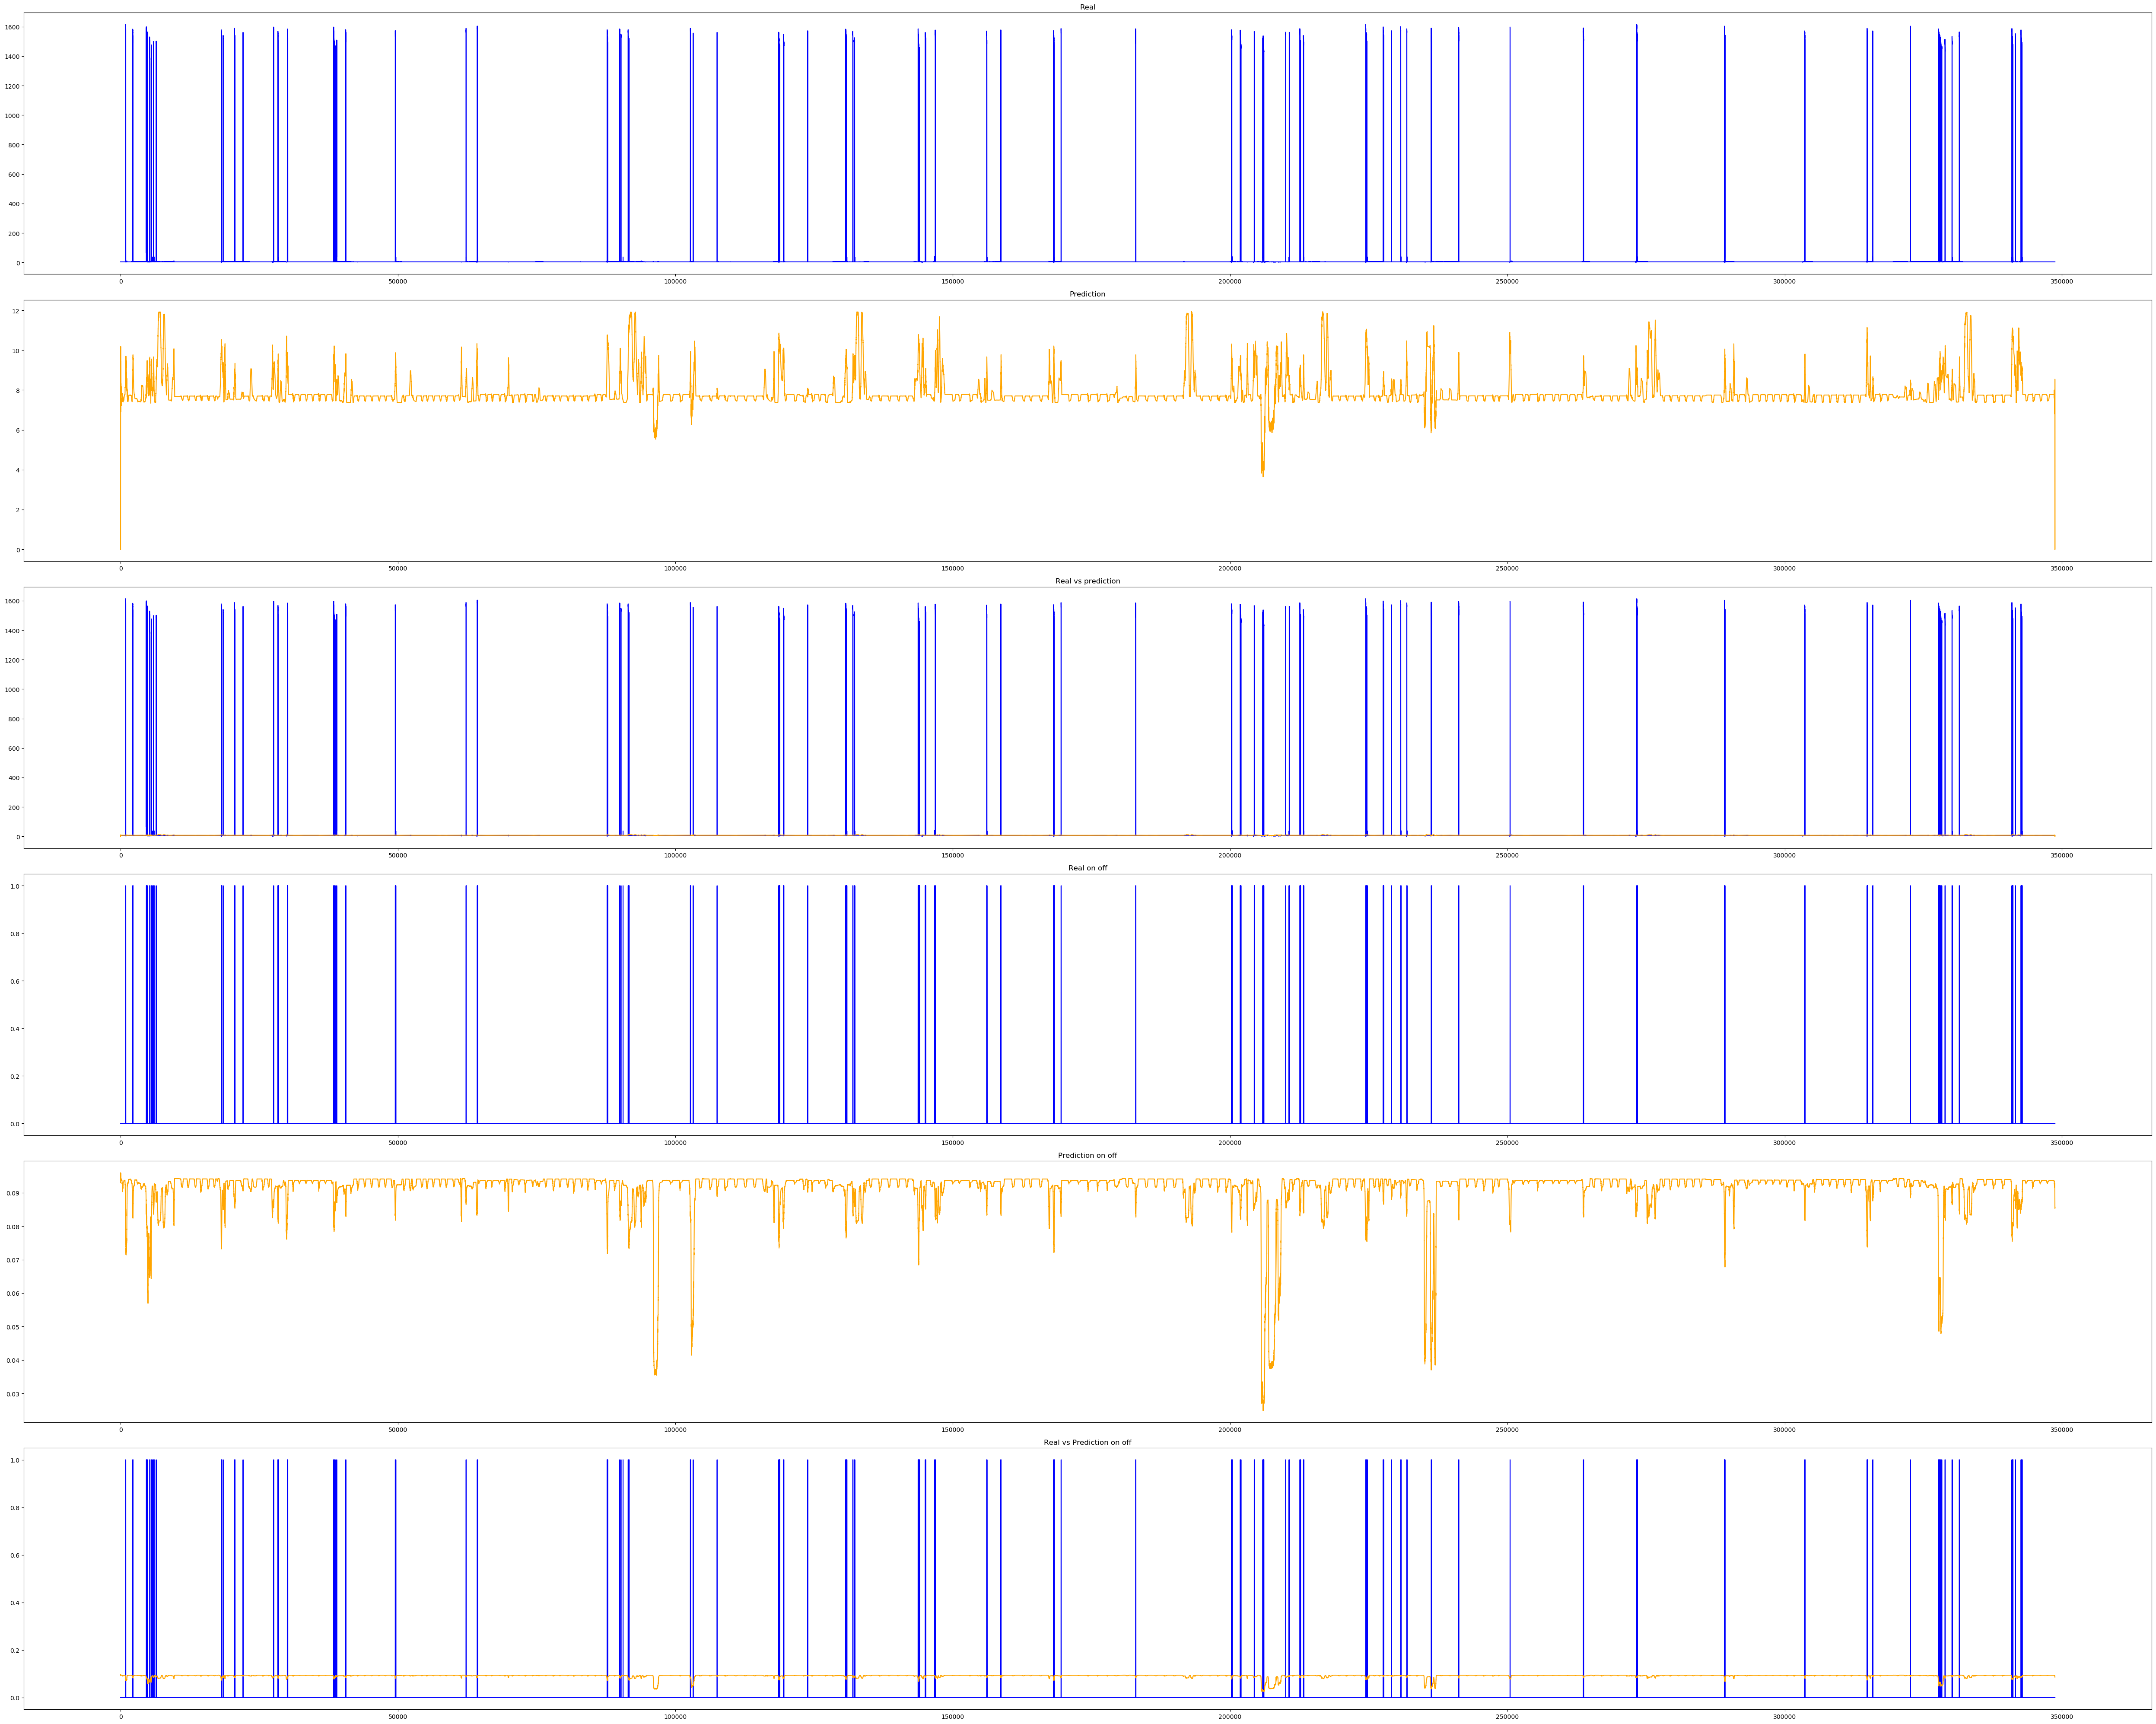

In [113]:
# Plot the result of the prediction
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(50, 40))
axes[0].set_title("Real")
axes[0].plot(np.arange(len(appliance_test)), appliance_test, color='blue')
axes[1].set_title("Prediction")
axes[1].plot(np.arange(len(prediction)), prediction, color='orange')
axes[2].set_title("Real vs prediction")
axes[2].plot(np.arange(len(appliance_test)), appliance_test, color='blue')
axes[2].plot(np.arange(len(prediction)), prediction, color='orange')
axes[3].set_title("Real on off")
axes[3].plot(np.arange(len(appliance_test_classification)), appliance_test_classification, color='blue')
axes[4].set_title("Prediction on off")
axes[4].plot(np.arange(len(prediction_on_off)), prediction_on_off, color='orange')
axes[5].set_title("Real vs Prediction on off")
axes[5].plot(np.arange(len(appliance_test_classification)), appliance_test_classification, color='blue')
axes[5].plot(np.arange(len(prediction_on_off)), prediction_on_off, color='orange')
fig.tight_layout()

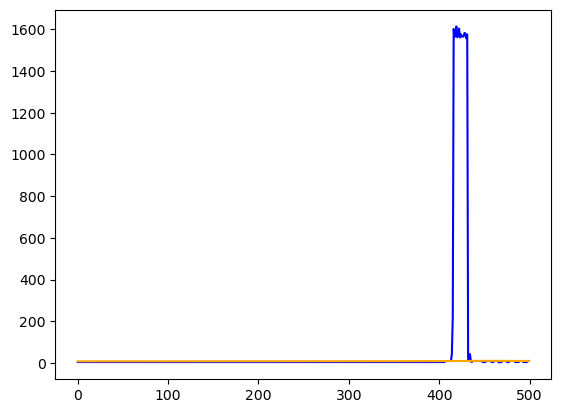

In [120]:
plt.plot(np.arange(500), appliance_test[500:1000], color='blue')
plt.plot(np.arange(500), prediction[500:1000], color='orange')
plt.show()